# Conhecendo a base de dados

## Importando os dados

In [1]:
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'
dados = pd.read_csv(url, sep = ';')

In [3]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


# Caracteristicas gerais dos dados

In [4]:
dados.shape

(32960, 9)

In [5]:
dados.columns

Index(['Tipo', 'Bairro', 'Quartos', 'Vagas', 'Suites', 'Area', 'Valor',
       'Condominio', 'IPTU'],
      dtype='object')

In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [7]:
dados['Tipo']

0                      Quitinete
1                           Casa
2        Conjunto Comercial/Sala
3                    Apartamento
4                    Apartamento
                  ...           
32955                  Quitinete
32956                Apartamento
32957                Apartamento
32958                Apartamento
32959    Conjunto Comercial/Sala
Name: Tipo, Length: 32960, dtype: object

In [8]:
dados[['Quartos','Valor']]

,Quartos,Valor
0,1,1700.0
1,2,7000.0
2,0,5200.0
3,1,800.0
4,1,800.0
...,...,...
32955,0,800.0
32956,3,1800.0
32957,2,1400.0
32958,2,3000.0


# Demandas do time de ML

## Análise Exploratória de Dados (EDA)
- Identificar quais valores médios de aluguel por tipo de imóvel
- Identificar o percentual de cada tipo de imóvel na nossa base de dados

In [9]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0


In [10]:
dados.groupby('Tipo')[['Valor']].mean().sort_values('Valor')

,Valor
Tipo,
Quitinete,1246.840909
Pousada/Chalé,1480.000000
Casa de Vila,1574.369478
Box/Garagem,1899.756098
Studio,2400.000000
Loft,2557.882353
Flat,4546.189076
Apartamento,4744.614648
Chácara,4900.000000


### Separando os imóvies do tipo Comercial

In [11]:
dados['Tipo'].unique()

array(['Quitinete', 'Casa', 'Conjunto Comercial/Sala', 'Apartamento',
       'Casa de Condomínio', 'Prédio Inteiro', 'Flat', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial', 'Casa de Vila',
       'Terreno Padrão', 'Box/Garagem', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria'],
      dtype=object)

In [12]:
imoveis_comerciais = ['Conjunto Comercial/Sala','Prédio Inteiro','Loja/Salão','Galpão/Depósito/Armazém', 'Casa Comercial','Terreno Padrão','Loja Shopping/ Ct Comercial','Box/Garagem','Chácara', 'Loteamento/Condomínio','Sítio','Pousada/Chalé','Hotel','Indústria','Studio']

In [13]:
dados.query('@imoveis_comerciais not in Tipo')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [14]:
imoveis_residenciais = dados.query('@imoveis_comerciais not in Tipo')
imoveis_comerciais = dados.query('@imoveis_comerciais in Tipo')

In [15]:
imoveis_residenciais.Tipo.unique()

array(['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Flat',
       'Casa de Vila', 'Loft'], dtype=object)

### Média de valor de aluguel de imovel por tipo

In [16]:
df_media_aluguel_por_imovel_residencial = imoveis_residenciais.groupby('Tipo')[['Valor']].mean().sort_values('Valor')
df_media_aluguel_por_imovel_comercial = imoveis_comerciais.groupby('Tipo')[['Valor']].mean().sort_values('Valor')

<Axes: ylabel='Tipo'>

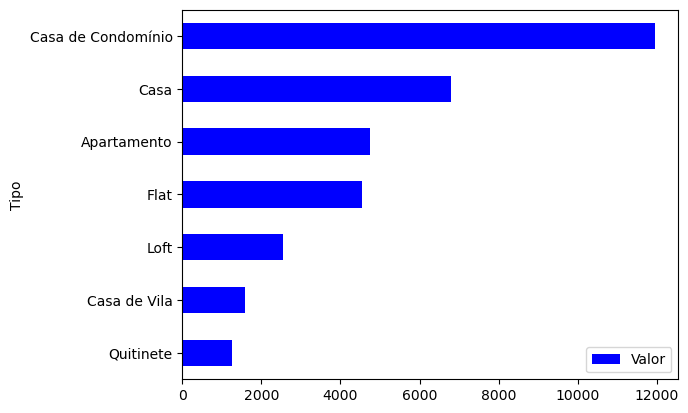

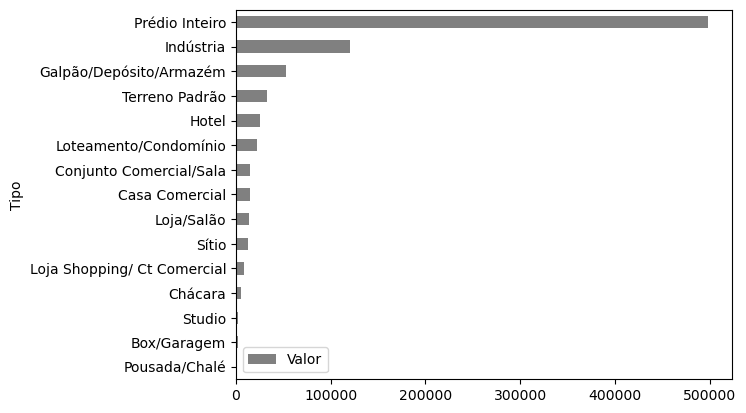

In [17]:
df_media_aluguel_por_imovel_residencial.plot(kind = 'barh', color = 'blue')
df_media_aluguel_por_imovel_comercial.plot(kind = 'barh', color = 'gray')

### Verificação de Qual é o Percentual de cada tipo de Imóvel residencial

In [18]:
imoveis_residenciais.Tipo.unique()


array(['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Flat',
       'Casa de Vila', 'Loft'], dtype=object)

In [19]:
#Verificação de quantas vezes cada tipo de imóvel residencial aparece nos dados
imoveis_residenciais.Tipo.value_counts(normalize=True)

Tipo
Apartamento           0.845285
Casa de Condomínio    0.043104
Casa                  0.041849
Quitinete             0.036180
Flat                  0.020600
Casa de Vila          0.010776
Loft                  0.002207
Name: proportion, dtype: float64

In [20]:
imoveis_residenciais.Tipo.value_counts(normalize=True).to_frame().sort_values('proportion') # Percentuais ordenados em forma crescente

,proportion
Tipo,
Loft,0.002207
Casa de Vila,0.010776
Flat,0.020600
Quitinete,0.036180
Casa,0.041849
Casa de Condomínio,0.043104
Apartamento,0.845285


In [21]:
df_percent_for_tipo = imoveis_residenciais.Tipo.value_counts(normalize=True).to_frame().sort_values('proportion')


<Axes: xlabel='Tipos', ylabel='Percentual (%)'>

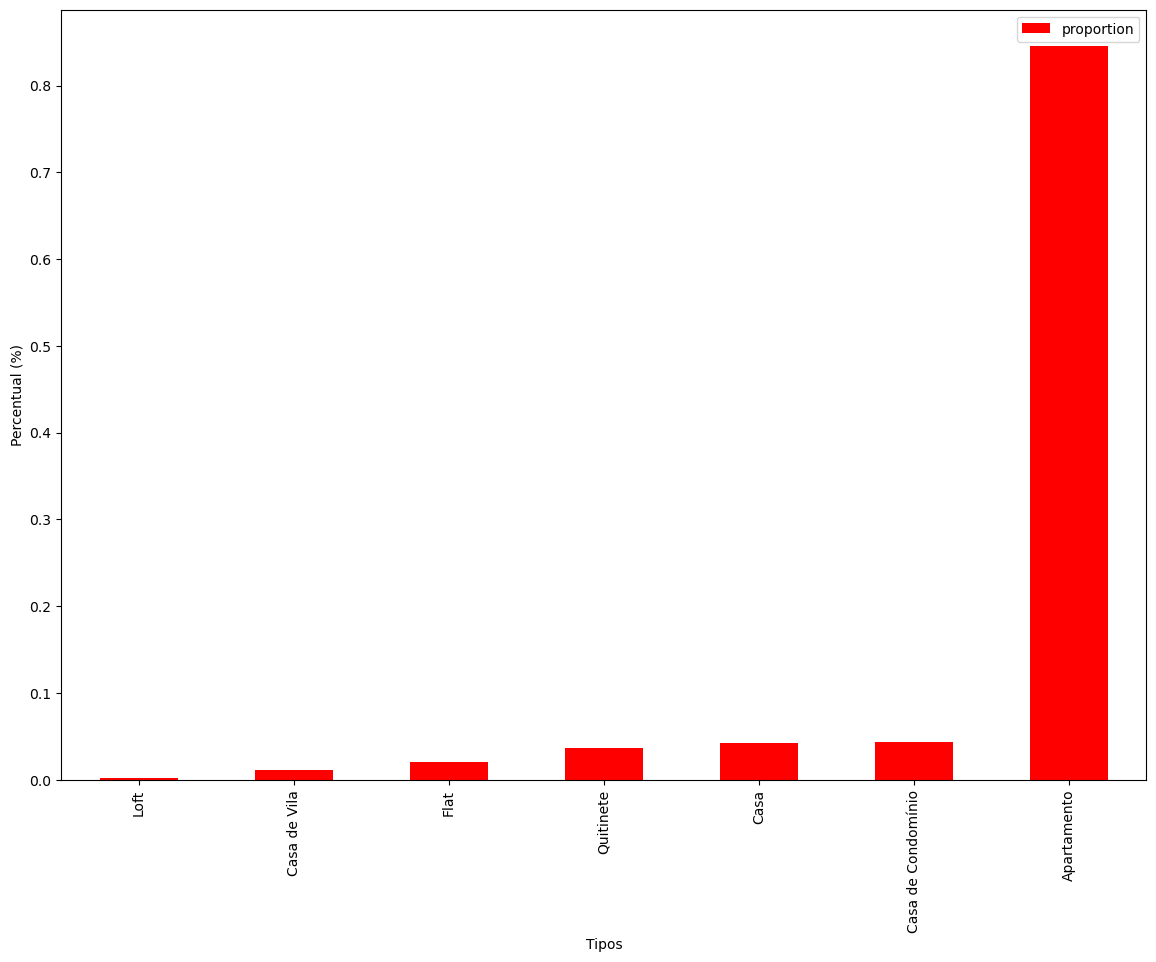

In [22]:
df_percent_for_tipo.plot(kind = 'bar', figsize =  (14,10), color = 'red', xlabel = 'Tipos', ylabel = 'Percentual (%)')

In [23]:
df = imoveis_residenciais.query('Tipo == "Apartamento"')
df.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
11,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0
12,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
13,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0
15,Apartamento,Copacabana,4,3,1,243,13000.0,2000.0,803.0
19,Apartamento,Freguesia (Jacarepaguá),3,0,0,54,950.0,300.0,28.0


## Lidando com dados nulos

In [24]:
#Verificando quais dados estão nulos do dataframe
df.isnull()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True
5,False,False,False,False,False,False,False,True,True
6,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...
32951,False,False,False,False,False,False,False,False,True
32953,False,False,False,False,False,False,False,False,False
32956,False,False,False,False,False,False,False,False,False
32957,False,False,False,False,False,False,False,False,False


In [25]:
#Calculando a quantidade de dados nulos no Dataframe
df.isnull().sum()

Tipo             0
Bairro           0
Quartos          0
Vagas            0
Suites           0
Area             0
Valor            7
Condominio     745
IPTU          5472
dtype: int64

Após a verificação ficou constatado que existem 3 colunas com dados nulos sendo elas:
- Condominio: 745;
- IPTU: 5472;
- Valor: 7;
  
A proxima etapa realizar o tratamento desses dados.
Neste caso como no meu dataframe os valores nulos são do tipo numericos, então estes valores serão subistituidos por '0',
entretanto essa é uma abordagem valida somente porque esses valores são numericos e não é uma abordagem válida como uma "Bala de prata" para qualquer tipo de dado#

In [26]:
#Para realizar o tratamento dos nulos substituindo por 0 será utilizado metodo: FILLNA

In [27]:
df.fillna(0)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
32951,Apartamento,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [28]:
df = df.fillna(0)

In [29]:
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,0.0,0.0


In [30]:
df.isnull().sum()

Tipo          0
Bairro        0
Quartos       0
Vagas         0
Suites        0
Area          0
Valor         0
Condominio    0
IPTU          0
dtype: int64

Apos o tratamento nenhuma coluna esta com dados nulos pois eles foram substituidos pelo valor 0 (Zero)

Existem varias maneiras de se tratar dados nulos quando se utiliza o Pandas.
Algumas das principais são:
- Remover os dados nulos: É ossivel remover as linhas ou colunas que possuem valores nulos utilizando o método dropna(). Esse método remove todas as linhas ou colunas que possuem pelo menos um valor nulo
- Prencher os dados nulos: Utilizando o método fillna() podemos preencher os valores nulos com um valor específico. Além disso também é possivel utilizar argumentos específicos do método fillna() como o method="ffill" ou method="bfill" para preencher os valores nulos com valor anterior ou posterior.
- Interpolar os dados nulos: É possivel itulizar o método interpolate() para preencher os valores nulos com valores interpolados, ou seja, valores calculados a partir dos valores vizinhos

é importante que se saiba escolher corretamente a melhor forma de tratar os dados nulos de acordo com a situação especifica e o objtetivo da análise de dados

# Remover registros inconsistenes 
## Será necessario remover os registros existentes na base de dados, sendo eles:
- apartamentos que posuem valor de aluguel igual a 0;
- apartamento com valoro de condomínio igual a 0;

Esses registros são inconsistentes por isso deve

In [31]:
df.query('Valor == 0 | Condominio == 0') #Selecionando os valores que tem Valor = 0 ou Condominio = 0

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0
10,Apartamento,Centro,1,0,0,36,1200.0,0.0,0.0
76,Apartamento,Barra da Tijuca,2,1,1,70,0.0,970.0,68.0
113,Apartamento,Praça Seca,2,0,0,80,1000.0,0.0,0.0
166,Apartamento,Rocha Miranda,2,1,0,50,1100.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
32609,Apartamento,Copacabana,3,0,0,130,4600.0,0.0,0.0
32643,Apartamento,Guadalupe,1,0,0,40,550.0,0.0,0.0
32666,Apartamento,Bonsucesso,1,0,0,60,1000.0,0.0,0.0
32708,Apartamento,Flamengo,2,0,0,59,3500.0,0.0,0.0


In [32]:
df.query('Valor == 0 | Condominio == 0').index

Index([    5,    10,    76,   113,   166,   194,   258,   265,   275,   292,
       ...
       32420, 32438, 32480, 32538, 32584, 32609, 32643, 32666, 32708, 32809],
      dtype='int64', length=752)

In [50]:
registros_a_remover = df.query('Valor == 0 | Condominio == 0').index 

In [54]:
 df.drop(registros_a_remover, axis=0, inplace = True) # Removendo todas as linhas que contem registros com valor 0

In [55]:
df.query('Valor == 0 | Condominio == 0')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU


In [56]:
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
11,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0
12,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0


In [57]:
df.Tipo.unique()

array(['Apartamento'], dtype=object)

In [58]:
df.drop('Tipo', axis = 1, inplace = True)

In [59]:
df.head()

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,0.0
6,Cachambi,2,0,0,50,1300.0,301.0,17.0
11,Grajaú,2,1,0,70,1500.0,642.0,74.0
12,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0


* Filtro: Apartamentos que possuem apenas 1 quarto e o aluguel é < 1.200 reais

In [60]:
df['Quartos']==1

3         True
4         True
6        False
11       False
12       False
         ...  
32951    False
32953    False
32956    False
32957    False
32958    False
Name: Quartos, Length: 18780, dtype: bool

In [62]:
selecao01 = df['Quartos'] == 1
df[selecao01]

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,0.0
13,Copacabana,1,0,1,40,2000.0,561.0,50.0
28,Tijuca,1,0,0,48,750.0,772.0,25.0
54,Centro,1,0,0,27,750.0,371.0,19.0
...,...,...,...,...,...,...,...,...
32918,Ipanema,1,0,0,55,2000.0,630.0,19.0
32922,Barra da Tijuca,1,1,0,62,1700.0,945.0,180.0
32935,Leblon,1,1,1,50,4300.0,1730.0,259.0
32938,Copacabana,1,0,0,50,1950.0,450.0,70.0


In [63]:
df['Valor'] <= 1200

3         True
4         True
6        False
11       False
12       False
         ...  
32951     True
32953     True
32956    False
32957    False
32958    False
Name: Valor, Length: 18780, dtype: bool

In [64]:
selecao02 = df['Valor'] <= 1200

In [65]:
df[selecao02]

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,0.0
19,Freguesia (Jacarepaguá),3,0,0,54,950.0,300.0,28.0
23,Olaria,3,1,0,68,1000.0,670.0,0.0
28,Tijuca,1,0,0,48,750.0,772.0,25.0
...,...,...,...,...,...,...,...,...
32925,Campinho,2,0,0,63,800.0,392.0,0.0
32930,Freguesia (Jacarepaguá),2,1,0,60,500.0,900.0,148.0
32950,Tijuca,1,0,0,28,1000.0,360.0,25.0
32951,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0


In [66]:
selecao_final = (selecao01) & (selecao02)

In [69]:
df[selecao_final]

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,0.0
28,Tijuca,1,0,0,48,750.0,772.0,25.0
54,Centro,1,0,0,27,750.0,371.0,19.0
94,Centro,1,1,0,37,1100.0,540.0,900.0
...,...,...,...,...,...,...,...,...
32596,Grajaú,1,0,1,37,1000.0,200.0,0.0
32617,Pechincha,1,0,1,69,900.0,640.0,126.0
32627,Glória,1,0,0,46,1100.0,453.0,32.0
32714,Botafogo,1,0,0,21,1000.0,282.0,25.0


In [70]:
df_1 = df[selecao_final]

In [79]:
selecao = (df['Quartos'] >= 2) & (df['Valor'] < 3000) & (df['Area'] > 70 )

In [80]:
selecao.head()

3     False
4     False
6     False
11    False
12     True
dtype: bool

In [81]:
df[selecao]

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
12,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
21,Tijuca,2,1,0,110,1900.0,700.0,138.0
24,Tijuca,2,1,0,78,2000.0,700.0,0.0
32,Botafogo,2,1,0,76,2500.0,740.0,0.0
36,Recreio dos Bandeirantes,3,1,1,105,2300.0,648.0,0.0
...,...,...,...,...,...,...,...,...
32934,Jacarepaguá,2,1,1,78,2200.0,790.0,180.0
32940,Barra da Tijuca,2,1,1,85,2250.0,1561.0,197.0
32941,Barra da Tijuca,3,2,0,98,2300.0,887.0,177.0
32944,Recreio dos Bandeirantes,3,2,1,88,1550.0,790.0,0.0


In [82]:
df_2 = df[selecao]

## Salvando os dados

In [90]:
df.to_csv('dados_apartamentos.csv', index = False, sep = ';')

In [92]:
pd.read_csv('dados_apartamentos.csv', sep = ';')

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Centro,1,0,0,15,800.0,390.0,20.0
1,Higienópolis,1,0,0,48,800.0,230.0,0.0
2,Cachambi,2,0,0,50,1300.0,301.0,17.0
3,Grajaú,2,1,0,70,1500.0,642.0,74.0
4,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
...,...,...,...,...,...,...,...,...
18775,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0
18776,Méier,2,0,0,70,900.0,490.0,48.0
18777,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
18778,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [93]:
df_1.to_csv('filtro_01.csv', index = False, sep = ';')

In [94]:
df_2.to_csv('filtro_02.csv', index = False, sep = ';')

# Manipulando os dados

In [95]:
## Criando Conlunas numéricas

In [96]:
url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'
dados = pd.read_csv(url, sep = ';')

In [97]:
dados['Valor_por_mes'] = dados['Valor'] + dados['Condominio']
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0


In [98]:
dados['Valor_por_ano'] = dados['Valor_por_mes'] * 12 + dados['IPTU']

In [99]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes,Valor_por_ano
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0,NaN
